# STEM-AND-LEAF PLOT — FULL PYTHON IMPLEMENTATION

In [1]:
import numpy as np

def stem_and_leaf(data, scale=1):
    """
    Generate a stem-and-leaf plot.

    Parameters:
        data (list or array): numeric dataset
        scale (int): number of digits included in the leaf
                     scale=1 -> leaf = last digit
                     scale=10 -> leaf = last 2 digits (for larger numbers)

    Prints the stem-and-leaf plot.
    """
    
    data = sorted(data)
    
    # Create dictionary for stems
    stems = {}

    for num in data:
        stem = int(num) // scale
        leaf = int(num) % scale
        leaf = str(leaf).zfill(len(str(scale))-1)  # proper formatting

        stems.setdefault(stem, []).append(leaf)

    print("STEM | LEAVES")
    print("--------------")

    for stem, leaves in stems.items():
        print(f"{stem:4} | {' '.join(leaves)}")


## Basic Stem-and-Leaf Plot

In [2]:
data = [12, 15, 18, 21, 22, 23, 34, 36, 37, 42, 45, 47, 52, 53, 59]

stem_and_leaf(data, scale=10)


STEM | LEAVES
--------------
   1 | 2 5 8
   2 | 1 2 3
   3 | 4 6 7
   4 | 2 5 7
   5 | 2 3 9


## Stem-and-Leaf for Decimal Numbers

In [3]:
data = [1.2, 1.5, 1.7, 2.0, 2.3, 2.6, 2.9, 3.1]
data_scaled = [int(x * 10) for x in data]  # convert to whole numbers

stem_and_leaf(data_scaled, scale=10)


STEM | LEAVES
--------------
   1 | 2 5 7
   2 | 0 3 6 9
   3 | 1


## Stem-and-Leaf with Larger Leaf Size (e.g., 2-digit leaf)

In [4]:
data = [125, 132, 146, 153, 160, 178, 182, 199]

stem_and_leaf(data, scale=100)  # 2-digit leaves


STEM | LEAVES
--------------
   1 | 25 32 46 53 60 78 82 99


## Stem-and-Leaf Plot (Vertical Format)

In [5]:
def stem_leaf_vertical(data):
    data = sorted(data)
    stems = {}

    for num in data:
        stem = num // 10
        leaf = num % 10
        stems.setdefault(stem, []).append(leaf)

    print("Vertical Stem-and-Leaf Plot\n")
    for stem in sorted(stems.keys()):
        print(f"{stem} |")
        for leaf in stems[stem]:
            print(f"   {leaf}")
        print()
        
stem_leaf_vertical([12, 15, 18, 22, 29, 31, 33, 35])


Vertical Stem-and-Leaf Plot

1 |
   2
   5
   8

2 |
   2
   9

3 |
   1
   3
   5



## Multiple Group Comparison (Two Stem-and-Leaf Plots)

In [6]:
data_A = np.random.randint(10, 90, 20)
data_B = np.random.randint(10, 90, 20)

print("Group A:")
stem_and_leaf(data_A, scale=10)

print("\nGroup B:")
stem_and_leaf(data_B, scale=10)


Group A:
STEM | LEAVES
--------------
   1 | 5
   2 | 3 3 6
   3 | 0 2
   4 | 0 1 2 4 8
   5 | 0 2 6 7 8 9
   6 | 2 7
   8 | 2

Group B:
STEM | LEAVES
--------------
   1 | 3 3 5 5
   2 | 5
   3 | 6 8
   4 | 0 1 2
   6 | 1 3 3 5 5 6 7
   7 | 0 9
   8 | 2


## Pretty ASCII Display (Centered Leaves)

In [7]:
def fancy_stem_leaf(data):
    data = sorted(data)

    stems = {}
    for num in data:
        stem = num // 10
        leaf = num % 10
        stems.setdefault(stem, []).append(leaf)

    max_len = max(len(l) for l in stems.values())

    print("STEM  |  LEAVES")
    print("--------------------")

    for stem, leaves in stems.items():
        leaf_str = " ".join(map(str, leaves))
        print(f"{stem:4}  |  {leaf_str: <{max_len*2}}")
        

fancy_stem_leaf([12, 14, 15, 22, 27, 33, 34, 39, 41, 46, 48])


STEM  |  LEAVES
--------------------
   1  |  2 4 5 
   2  |  2 7   
   3  |  3 4 9 
   4  |  1 6 8 


## Graphical Stem-and-Leaf Plot (Presentation-Style Visualization)

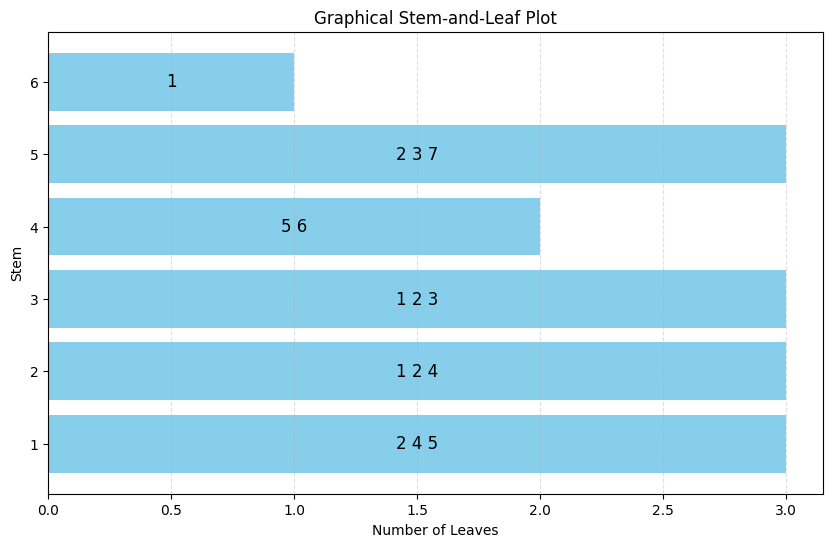

In [8]:
import matplotlib.pyplot as plt

data = [12, 14, 15, 21, 22, 24, 31, 32, 33, 45, 46, 52, 53, 57, 61]

# Build stem-leaf structure
stem_leaf = {}
for num in data:
    stem = num // 10
    leaf = num % 10
    stem_leaf.setdefault(stem, []).append(leaf)

# Sort stems
stems = sorted(stem_leaf.keys())
counts = [len(stem_leaf[s]) for s in stems]

# Prepare labels (leaves inside bars)
leaf_labels = [" ".join(str(l) for l in sorted(stem_leaf[s])) for s in stems]

plt.figure(figsize=(10, 6))
bars = plt.barh(stems, counts, color='skyblue')

# Annotate leaves inside bars
for bar, label in zip(bars, leaf_labels):
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height()/2,
             label, ha='center', va='center', fontsize=12)

plt.xlabel("Number of Leaves")
plt.ylabel("Stem")
plt.title("Graphical Stem-and-Leaf Plot")
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.show()


## tem-and-Leaf as a Vertical Plot (Each leaf as a point)

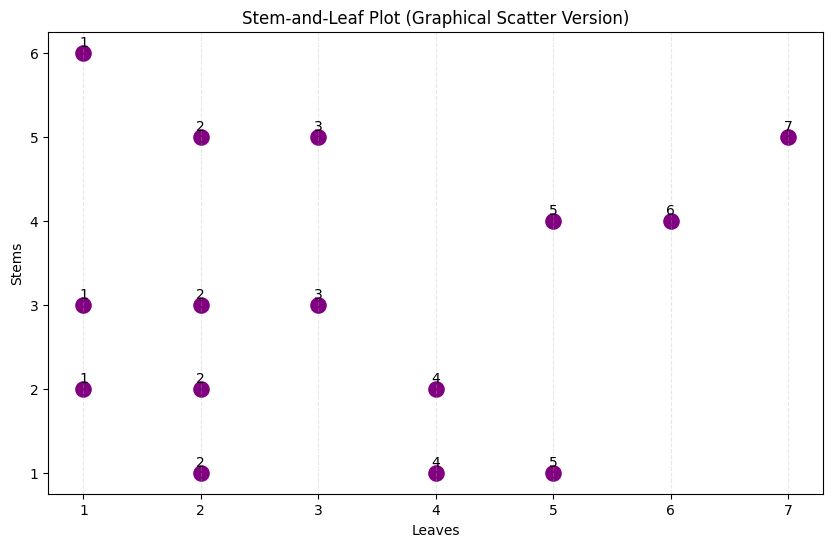

In [9]:
import matplotlib.pyplot as plt

data = [12, 14, 15, 21, 22, 24, 31, 32, 33, 45, 46, 52, 53, 57, 61]

stem_leaf = {}
for num in data:
    stem = num // 10
    leaf = num % 10
    stem_leaf.setdefault(stem, []).append(leaf)

stems = sorted(stem_leaf.keys())

plt.figure(figsize=(10, 6))

for i, stem in enumerate(stems):
    leaves = sorted(stem_leaf[stem])
    y = [i] * len(leaves)
    plt.scatter(leaves, y, s=120, color="purple")
    for lx, ly in zip(leaves, y):
        plt.text(lx, ly + 0.07, str(lx), ha='center')

plt.yticks(range(len(stems)), stems)
plt.xlabel("Leaves")
plt.ylabel("Stems")
plt.title("Stem-and-Leaf Plot (Graphical Scatter Version)")
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.show()


## Fully Styled Stem-Leaf Chart (Best for Presentation)

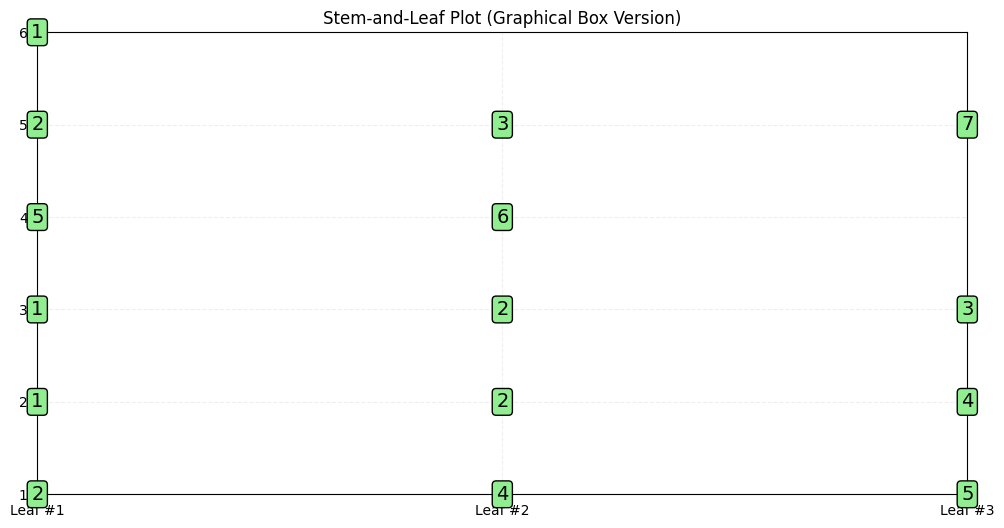

In [10]:
import matplotlib.pyplot as plt
import numpy as np

data = [12, 14, 15, 21, 22, 24, 31, 32, 33, 45, 46, 52, 53, 57, 61]

stem_leaf = {}
for num in data:
    stem = num // 10
    leaf = num % 10
    stem_leaf.setdefault(stem, []).append(leaf)

stems = sorted(stem_leaf.keys())
max_leaves = max(len(v) for v in stem_leaf.values())

plt.figure(figsize=(12, 6))

for i, stem in enumerate(stems):
    leaves = sorted(stem_leaf[stem])
    for j, leaf in enumerate(leaves):
        plt.text(j, i, str(leaf), fontsize=14, ha='center', va='center',
                 bbox=dict(boxstyle="round,pad=0.2", fc="lightgreen"))

plt.xticks(range(max_leaves), ["Leaf #"+str(i+1) for i in range(max_leaves)])
plt.yticks(range(len(stems)), stems)

plt.title("Stem-and-Leaf Plot (Graphical Box Version)")
plt.grid(axis='both', linestyle='--', alpha=0.2)

plt.show()
